In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data_t=pd.read_csv("D:\\data_sets\\train_data.csv")
dis_data=pd.read_csv("D:\\data_sets\\discount_features-1646155022154.csv")
test_data=pd.read_csv("D:\\data_sets\\test_data-1646154813929.csv")
foot_data=pd.read_csv("D:\\data_sets\\foot_fall-1646154997847.csv")

In [15]:
data_t.head()

,year,month,day,city,medicine,sales
0,2015,1,2,1,1,24.0
1,2015,1,2,1,2,144.0
2,2015,1,2,1,3,84.0
3,2015,1,2,1,4,24.0
4,2015,1,2,1,5,8.0


In [8]:
def split_date(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['day'] = df.date.dt.day

In [9]:
foot_data1 = pd.melt(foot_data, id_vars=["city"], var_name="date", value_name="footfall")
split_date(foot_data1)
data={"city":{"Mumbai":4,  "Delhi":5,  "Bangalore":7,  "Kolkata":1,  "Chennai":6,  "Hyderabad":8,  "Ahmedabad":9,  "Jaipur":3,  "Lucknow":10,  "Other":2}}
foot_data1 = foot_data1.replace(data)
foot_data1.drop("date",axis=1,inplace=True)

In [5]:
Max_thershold=foot_data1["footfall"].quantile(0.99)
Min_thershold=foot_data1["footfall"].quantile(0.01)
foot_data1=foot_data1[(foot_data1["footfall"]<Max_thershold) & (foot_data1["footfall"]> Min_thershold)]
foot_data1.drop(foot_data1[foot_data1["footfall"]<0].index,inplace=True)

In [6]:
foot_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12413 entries, 0 to 12668
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      12413 non-null  int64  
 1   footfall  12413 non-null  float64
 2   year      12413 non-null  int64  
 3   month     12413 non-null  int64  
 4   day       12413 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 839.9 KB


In [7]:
split_date(dis_data)
dis_data.drop("date",axis=1,inplace=True)
dis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17277949 entries, 0 to 17277948
Data columns (total 6 columns):
 #   Column      Dtype
---  ------      -----
 0   city        int64
 1   medicine    int64
 2   discounted  int64
 3   year        int64
 4   month       int64
 5   day         int64
dtypes: int64(6)
memory usage: 790.9 MB


In [8]:
td_data1=data_t.merge(dis_data,on=["year","month","day","city","medicine"],how="left")
td_data1.fillna(0,axis=1,inplace=True)
test_data1=test_data.merge(dis_data,on=["year","month","day","city","medicine"],how="left")
test_data1.fillna(0,axis=1,inplace=True)
td_data1.drop(td_data1[td_data1["sales"]<0].index,inplace=True)

In [9]:
td_data=td_data1.merge(foot_data1,on=["year","month","day","city"],how="left")

In [10]:
td_data.fillna(0,inplace=True)

In [11]:
data_t["half_yearly"]=data_t['month']
data={"half_yearly":{1:0,2:0,3:0,4:0,5:0,6:0,7:1,8:1,9:1,10:1,11:1,12:1}}
data_t = data_t.replace(data)

# EDA part

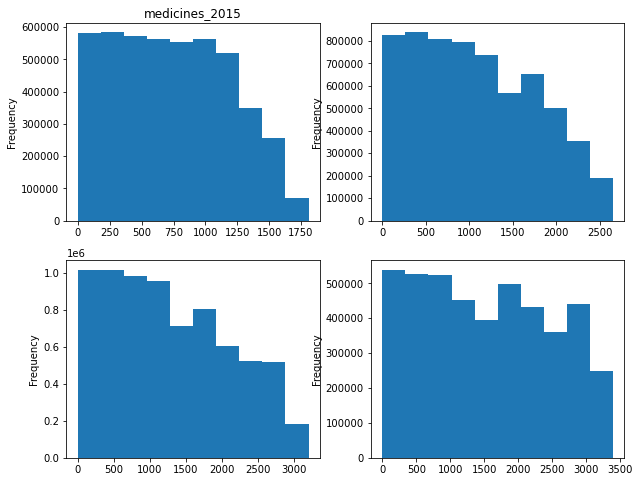

In [12]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
data_t[data_t.year==2015].medicine.plot.hist()
plt.title("medicines_2015")
plt.subplot(2,2,2)
data_t[data_t.year==2016].medicine.plot.hist()
plt.subplot(2,2,3)
data_t[data_t.year==2017].medicine.plot.hist()
plt.subplot(2,2,4)
data_t[data_t.year==2018].medicine.plot.hist()
ylabel='Frequency'

we can clearly see that every year new medicines are adding.

# yearly sales

<AxesSubplot:xlabel='year'>

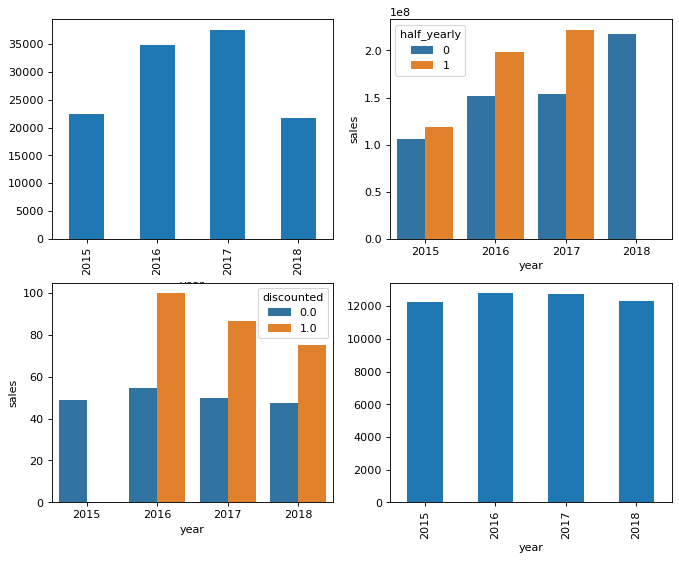

In [13]:
#yearly sales report
figure(figsize=(10, 8), dpi=80)
year_sales=data_t.groupby("year")["sales"].sum()/10000
plt.subplot(2,2,1)
year_sales.plot.bar()

#half yearly sales
y=data_t.groupby(["year","half_yearly"])["sales"].sum().reset_index()
plt.subplot(2,2,2)
sns.barplot(x="year", y="sales", hue="half_yearly", data=y)
xlabel="year"
ylabel="sales"

#yearly sales based on discounts
year_dis=td_data.groupby(["year","discounted"])["sales"].mean().reset_index()
plt.subplot(2,2,3)
sns.barplot(x="year", y="sales",data=year_dis,hue="discounted")

#yearly footfall
plt.subplot(2,2,4)
foot_data1.groupby("year")["footfall"].mean().plot.bar()

we know that every year sales are increasing but in 2017 first half_year sales are not increased,the reason for it is downfall of 1st and 3rd month sales. we can see it in month/year report.city of jaipur and mumbai sales are down in 2017

Average discounted medicine sales are more than the non-discounted medicine sales per year
Clearly we can see that in 2015 there is no discount on medicine and sales is less
in 2018 averaage foot fall is decreased..

# Months by year sales report 

<AxesSubplot:xlabel='month', ylabel='footfall'>

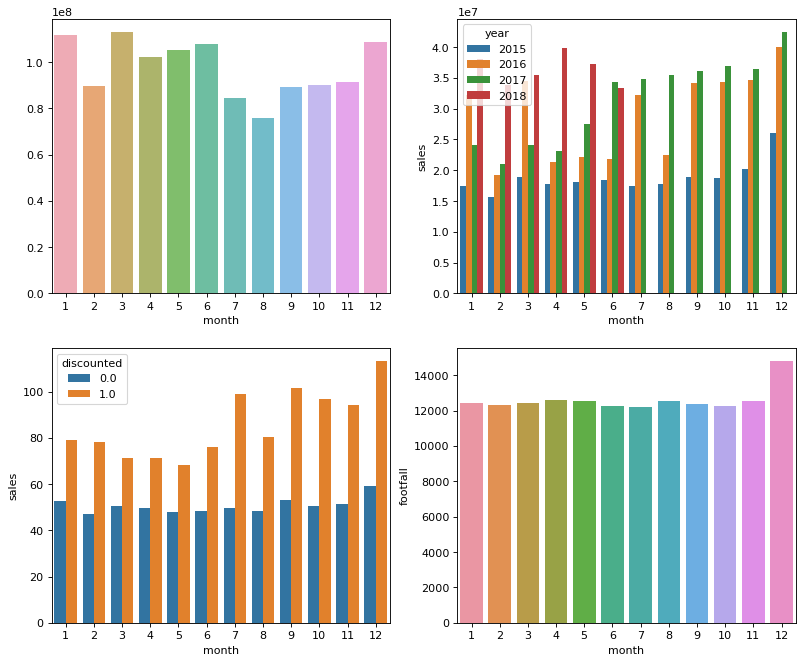

In [14]:
figure(figsize=(12, 10), dpi=80)

month_sales=data_t.groupby("month")["sales"].sum()
plt.subplot(2,2,1)
sns.barplot(x=month_sales.index, y=month_sales.values, alpha=0.8)

t=data_t.groupby(["year","month"])["sales"].sum().reset_index()
plt.subplot(2,2,2)
sns.barplot(x="month", y="sales", hue="year", data=t)




#every month sales based on discounts
month_dis=td_data.groupby(["month","discounted"])["sales"].mean().reset_index()
plt.subplot(2,2,3)
sns.barplot(x="month", y="sales",data=month_dis,hue="discounted")


#monthly footfall based on year

fm=foot_data1.groupby("month")["footfall"].mean().reset_index()
plt.subplot(2,2,4)
sns.barplot(x="month", y="footfall",data=fm)


in 2017 1st and 3rd month sales are down. we can see it in month/year report

Average monthly sales are more 

City wise sales yearly

<AxesSubplot:xlabel='city', ylabel='sales'>

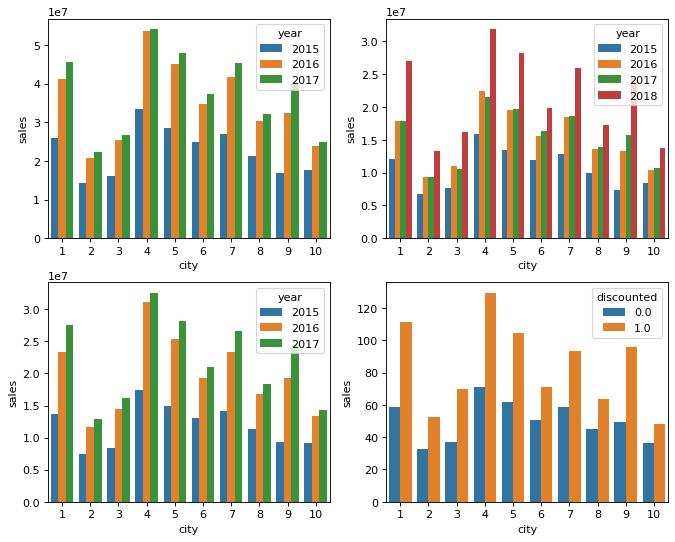

In [16]:
figure(figsize=(10, 8), dpi=80)

d=data_t.groupby(["year","city"])["sales"].sum().reset_index()
m=d[d["year"]!=2018]
plt.subplot(2,2,1)
sns.barplot(x="city", y="sales", hue="year", data=m)


k=data_t.groupby(["half_yearly","year","city"])["sales"].sum().reset_index()
h1=k[k["half_yearly"]==0]
plt.subplot(2,2,2)
sns.barplot(x="city", y="sales", hue="year", data=h1)

h2=k[k["half_yearly"]==1]
plt.subplot(2,2,3)
sns.barplot(x="city", y="sales", hue="year", data=h2)

cf_data=td_data.groupby(["city","discounted"])["sales"].mean().reset_index()
plt.subplot(2,2,4)
sns.barplot(x="city", y="sales",data=cf_data,hue="discounted")



City four as highest footfall and the sales are also high
footfall increases sales are increases.

<AxesSubplot:xlabel='city', ylabel='footfall'>

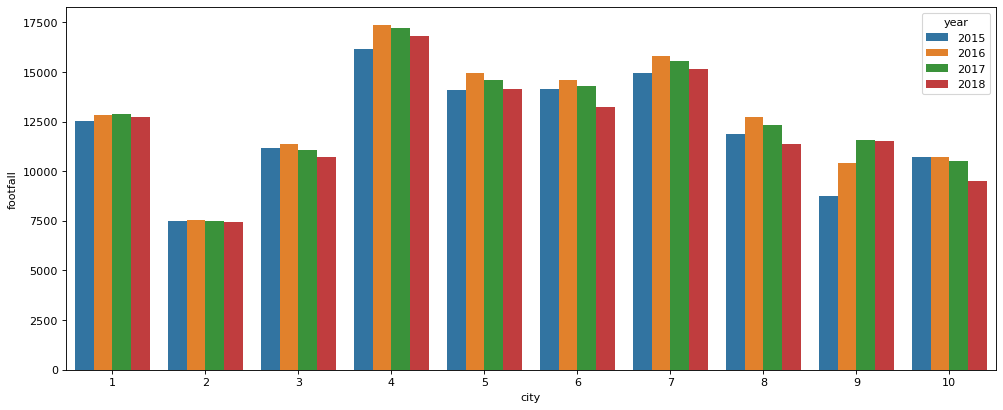

In [17]:
yc_data=foot_data1.groupby(["city","year"])["footfall"].mean().reset_index()
figure(figsize=(15, 6), dpi=80)
sns.barplot(x="city", y="footfall",data=yc_data,hue="year")

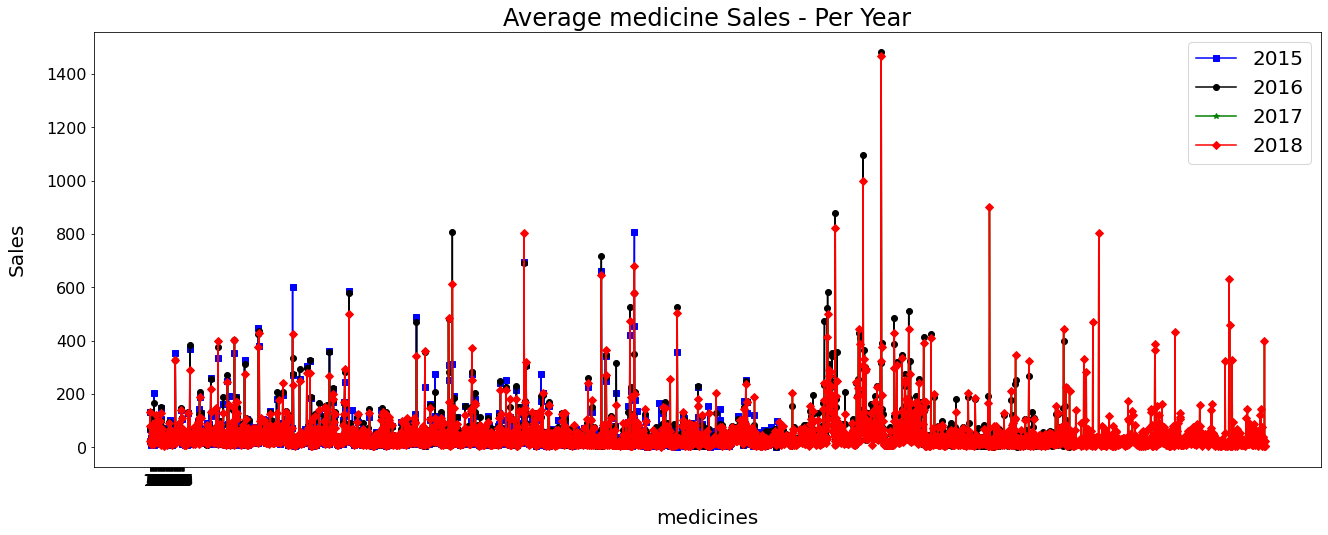

In [18]:
y2015_med = data_t[data_t.year==2015].groupby('medicine')['sales'].mean()
y2016_med = data_t[data_t.year==2016].groupby('medicine')['sales'].mean()
y2017_med = data_t[data_t.year==2017].groupby('medicine')['sales'].mean()
y2018_med = data_t[data_t.year==2018].groupby('medicine')['sales'].mean()


plt.figure(figsize=(22,8))
plt.plot(y2015_med.index, y2015_med.values, 's-b')
plt.plot(y2016_med.index, y2016_med.values, 'o-k')
plt.plot(y2017_med.index, y2017_med.values, '*-g')
plt.plot(y2017_med.index, y2017_med.values, 'D-r')

plt.xticks(np.arange(1, 100, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('medicines', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average medicine Sales - Per Year", fontsize=24)
plt.legend(['2015', '2016', '2017','2018'], fontsize=20);

# correlation matrix

<AxesSubplot:>

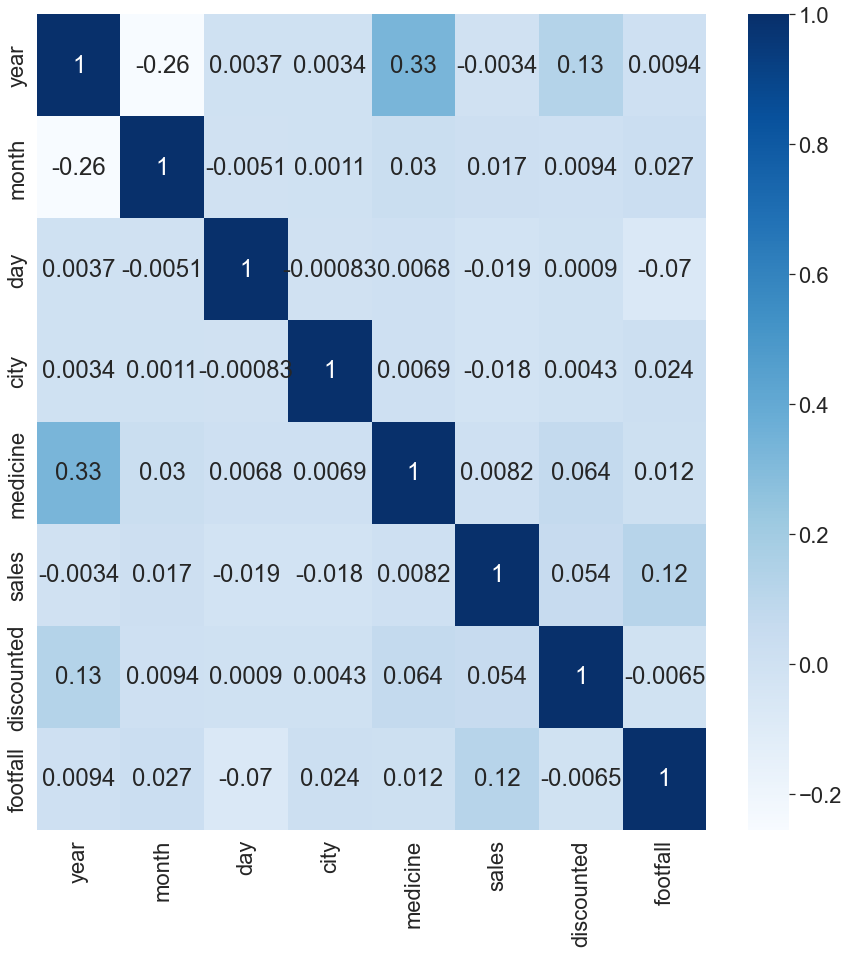

In [19]:
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
sns.heatmap(td_data.corr(), annot=True, cmap="Blues", fmt= ".2g")

# Data preparation

In [15]:
td_data.head()

,year,month,day,city,medicine,sales,discounted,footfall
0,2015,1,2,1,1,24.0,0.0,13948.0
1,2015,1,2,1,2,144.0,0.0,13948.0
2,2015,1,2,1,3,84.0,0.0,13948.0
3,2015,1,2,1,4,24.0,0.0,13948.0
4,2015,1,2,1,5,8.0,0.0,13948.0


In [16]:
data={"year":{2015:0,2016:1,2017:2,2018:3}}
td_data = td_data.replace(data)
test_data1 = test_data1.replace(data)
foot_data1 = foot_data1.replace(data)

In [17]:
td_data.year=td_data.year.astype("int16")
td_data.city=td_data.city.astype("int16")
td_data.month=td_data.month.astype("int16")
td_data.day=td_data.day.astype("int16")
td_data.discounted=td_data.discounted.astype("int16")
td_data.medicine=td_data.medicine.astype("int16")
td_data.footfall=td_data.footfall.astype("int16")


In [18]:
Max_thershold=td_data["sales"].quantile(0.99)
Min_thershold=td_data["sales"].quantile(0.01)
td_data=td_data[(td_data["sales"]<Max_thershold) & (td_data["sales"]> Min_thershold)]

In [19]:
td_data=td_data.groupby(["year","month",'medicine'], group_keys=False).apply(lambda x: x.sample(frac=0.3))

In [20]:
td_data.drop(td_data[td_data["sales"]<0].index,inplace=True)
td_data.drop(td_data[td_data["footfall"]<0].index,inplace=True)

In [21]:
td_data.drop("year",axis=1,inplace=True)
td_data.drop("month",axis=1,inplace=True)
td_data.drop("day",axis=1,inplace=True)

In [22]:
td_data=pd.get_dummies(td_data, columns=["city","discounted"])

In [23]:
import numpy
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

In [24]:
input_cols = td_data.columns.to_list()
input_cols.remove('sales')
target_col = 'sales'
x = td_data[input_cols].values
y = td_data[target_col].values

In [25]:
scaler = MinMaxScaler().fit(x)
rx = scaler.transform(x)

In [26]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [27]:
validation_size = 0.20
seed = 7

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(rx, y,test_size=validation_size, random_state=seed)

In [29]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('CART', DecisionTreeRegressor()))

In [30]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -3052.026812 (17.428702)
LASSO: -3116.487903 (17.629907)
EN: -3152.648682 (17.412548)
CART: -1784.055871 (7.019689)


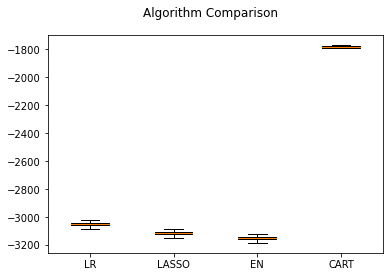

In [31]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [34]:
rf = RandomForestRegressor( bootstrap=True,max_depth=30,max_features=3,min_samples_leaf=5,min_samples_split=12,
                           n_estimators=200,random_state=42,verbose=1,n_jobs=-1)
rf.fit(X_train, Y_train)
Y_predict = rf.predict(X_test)
mse=MSE(Y_test,Y_predict)
rmse=np.sqrt(mse)
print(rmse)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 21.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min


44.8905351527619


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  1.3min finished


In [30]:
#Decision Tree Regressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, Y_train)
Y_predict = DTR.predict(X_test)
mse=MSE(Y_test,Y_predict)
rmse=np.sqrt(mse)
print(rmse)

41.98941171012387


In [35]:
#XGBOOST
XGB = XGBRegressor(random_state=42, n_jobs=-1)
XGB.fit(X_train, Y_train)
Y_predict = XGB.predict(X_test)
mse=MSE(Y_test,Y_predict)
rmse=np.sqrt(mse)
print(rmse)

53.33909190397465


# Predicting test file footfall

In [31]:

f_y=foot_data1.footfall.values
foot_data1.drop("footfall",axis=1,inplace=True)
f_x=foot_data1.values

In [32]:
col=foot_data1.columns.to_list()

In [33]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42, n_jobs=-1)
model.fit(f_x, f_y)
prediction = model.predict(test_data1[col])
test_data1["footfall"]=prediction


In [34]:
test_data1.describe()

,id,year,month,day,city,medicine,discounted,footfall
count,773535.000000,773535.0,773535.0,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000
mean,386768.000000,3.0,7.0,15.971202,5.498414,1589.581626,0.075526,11981.787109
std,223300.464575,0.0,0.0,9.002002,2.845757,978.991995,0.264238,2987.207764
min,1.000000,3.0,7.0,1.000000,1.000000,1.000000,0.000000,5262.610352
25%,193384.500000,3.0,7.0,8.000000,3.000000,728.000000,0.000000,9840.765625
50%,386768.000000,3.0,7.0,16.000000,5.000000,1571.000000,0.000000,11913.557617
75%,580151.500000,3.0,7.0,24.000000,8.000000,2419.000000,0.000000,13946.413086
max,773535.000000,3.0,7.0,31.000000,10.000000,3423.000000,1.000000,19520.089844


In [35]:
test_data1=pd.get_dummies(test_data1, columns=["city","discounted"])

In [36]:
t=test_data1[input_cols].values
rt = scaler.transform(t)

In [37]:
prediction = DTR.predict(rt)
test_data1["sales"]=prediction

In [66]:
test_data1.describe()

,id,year,month,day,medicine,footfall,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10,discounted_0,discounted_1,sales
count,773535.000000,773535.0,773535.0,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000,773535.000000
mean,386768.000000,3.0,7.0,15.971202,1589.581626,11981.787109,0.101783,0.091510,0.098099,0.105765,0.104147,0.101284,0.103936,0.096497,0.101502,0.095477,0.924474,0.075526,45.660428
std,223300.464575,0.0,0.0,9.002002,978.991995,2987.207764,0.302363,0.288333,0.297449,0.307537,0.305451,0.301705,0.305177,0.295272,0.301992,0.293873,0.264238,0.264238,57.479283
min,1.000000,3.0,7.0,1.000000,1.000000,5262.610352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.004000
25%,193384.500000,3.0,7.0,8.000000,728.000000,9840.765625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000
50%,386768.000000,3.0,7.0,16.000000,1571.000000,11913.557617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000
75%,580151.500000,3.0,7.0,24.000000,2419.000000,13946.413086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,52.000000
max,773535.000000,3.0,7.0,31.000000,3423.000000,19520.089844,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,412.984000


In [38]:
test_data1.to_csv("D:\\data_sets\\jaysree\\testing.csv")

In [ ]:
train=td_data.groupby(["year","month","day"])["sales"].sum().reset_index()

In [ ]:
test=test_data1.groupby(["year","month","day"])["sales"].sum().reset_index()

In [ ]:
final=train.merge(test,on=["year","month","day"],how="left")

In [ ]:
final=pd.to_datetime(final[['year', 'month', 'day']])

In [ ]:
final.plot()